In [2]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'imd_student_blind.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['Sheet1']


In [3]:
# Load a sheet into a DataFrame by index: df
df = xl.parse(0)

# Print the head of the DataFrame df
df.head()

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado


In [4]:
df.columns

Index(['a_ID', 'CEP', 'ano_ingresso', 'periodo_ingresso', 'status',
       'ano_disciplina', 'periodo_disciplina', 'nota', 'disciplina_ID',
       'status.disciplina'],
      dtype='object')

In [5]:
df.shape

(4842, 10)

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import folium
import geocoder
from tqdm import tqdm
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

cep = df["CEP"]

g = geocoder.google('CEP 59015430')
g.latlng


Populating the interactive namespace from numpy and matplotlib


[-5.8082672, -35.1956117]

In [7]:

# Step 1: Group the data to hide the user id
df1 = pd.DataFrame(df.groupby(['CEP'])['a_ID'].count()).reset_index()
df1 = df1.rename(columns = {'a_ID':'alunos_quant_CEP'})
df1.head(600)



,CEP,alunos_quant_CEP
0,0,289
1,1507000,6
2,5021000,6
3,5163000,7
4,6321200,9
5,12710520,9
6,12723000,8
7,18150000,7
8,18682430,7
9,22725150,4


In [8]:
# We tested the geocoder library with town and country as input. Let's create a new column in our dataframe that contains these values.
df1['geocode_input'] = df1['CEP']

# We also create two additional columns for lattitude and longitude.
df1['lat'], df1['long'] = [0, 0]

# Display the head of the updated dataframe.

g2 = geocoder.google("Natal-RN, CEP " + str(df1.loc[100,"CEP"]) + ", Brazil")
print("Natal-RN, CEP " + str(df1.loc[100,"CEP"]) + ", Brazil")
g2.latlng

Natal-RN, CEP 59054600, Brazil


[-5.811684199999999, -35.2261348]

In [9]:
for i in tqdm(range(len(df1))):
    g = geocoder.google("Natal-RN, CEP " + str(df1.loc[i,'CEP']) + ", Brazil")
    df1.ix[i,'lat'] = g.lat
    df1.ix[i,'long'] = g.lng
print('Geocoding complete!')

100%|██████████| 627/627 [11:51<00:00,  1.19s/it]

Geocoding complete!


In [10]:
df1.head(200)

,CEP,alunos_quant_CEP,geocode_input,lat,long
0,0,289,0,-5.824899,-35.243994
1,1507000,6,1507000,-5.835640,-35.210602
2,5021000,6,5021000,-5.835640,-35.210602
3,5163000,7,5163000,-5.835640,-35.210602
4,6321200,9,6321200,-5.835640,-35.210602
5,12710520,9,12710520,-5.835640,-35.210602
6,12723000,8,12723000,-5.835640,-35.210602
7,18150000,7,18150000,-5.835640,-35.210602
8,18682430,7,18682430,-5.835640,-35.210602
9,22725150,4,22725150,-5.835640,-35.210602


In [11]:
# Set map center and zoom level
mapc = [0, 30]
zoom = 2

# Create map object
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)
# Plot each of the locations that we geocoded
for j in tqdm(range(len(df1))):
    folium.Marker([df1.ix[j,'lat'], df1.ix[j,'long']],
        icon=folium.Icon(color='green',icon='info-sign')
        ).add_to(map_osm)
# Show the map
map_osm

100%|██████████| 627/627 [00:10<00:00, 57.39it/s]


In [12]:
from folium.plugins import HeatMap

# Set map center and zoom level
mapc = [0, 30]
zoom = 2

coordinates = []

for i in range(len(df1)):
    # eliminate items with'nan' element
    if all(~np.isnan([df1.ix[i,'lat'], df1.ix[i,'long'], df1.ix[i,'alunos_quant_CEP']])):
        coordinates.append([df1.ix[i,'lat'], df1.ix[i,'long'], df1.ix[i,'alunos_quant_CEP']])

# Create map object
m = folium.Map(location=mapc,
                    zoom_start=zoom)

HeatMap(coordinates).add_to(m)

m

In [31]:
# Step 1: Group the data to hide the user id
df.loc[df['status.disciplina'] == 'Aprovado']


df3 = df.loc[df['status.disciplina'] == 'Aprovado']
df4 = df.loc[df['status.disciplina'] == 'Reprovado']


In [35]:
df2 = pd.DataFrame(df3.groupby(['disciplina_ID'])['status.disciplina'].count()).reset_index()
df2 = df2.rename(columns = {'status.disciplina':'alunos_quant_CEP'})
df2.head(600)

,disciplina_ID,status.disciplina
0,0,349
1,1,667
2,2,493
3,3,207
4,4,511
5,5,260
6,6,279


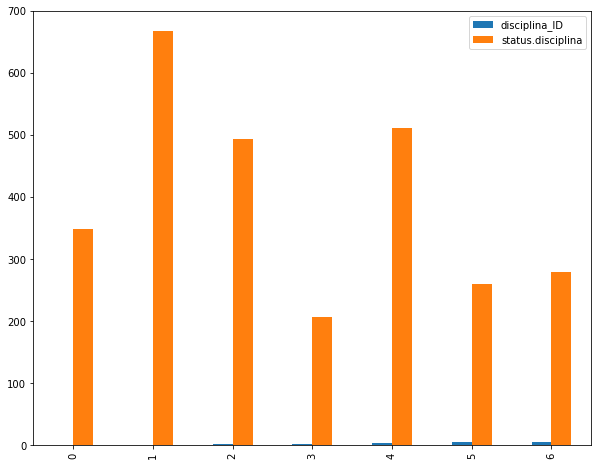

In [42]:
#Grafico de Aprovados por disciplina
df2.plot(kind='bar')

In [32]:
df5 = pd.DataFrame(df4.groupby(['disciplina_ID'])['status.disciplina'].count()).reset_index()
df5 = df5.rename(columns = {'status.disciplina':'alunos_quant_CEP'})
df5.head(600)

,disciplina_ID,alunos_quant_CEP
0,0,321
1,1,109
2,2,323
3,3,334
4,4,163
5,5,523
6,6,303


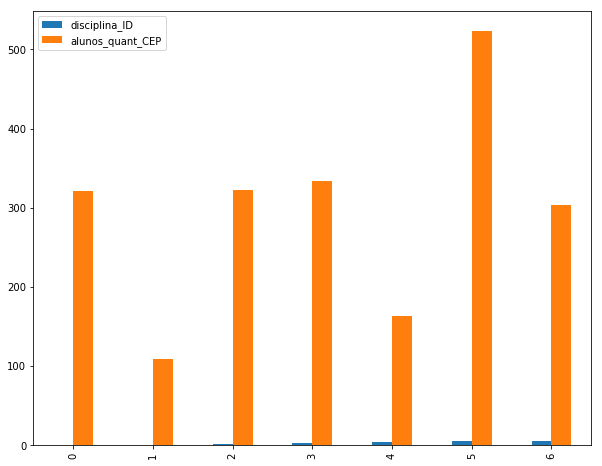

In [44]:
#Grafico de Reprovados por disciplina
df5.plot(kind='bar')

In [64]:
#Localizacao dos aprovados na disciplina 5
df6 = df.loc[df['status.disciplina'] == 'Aprovado']
df7 = df6.loc[df['disciplina_ID'] == 5]
df7

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina
1086,2,59072580,2014,1,ATIVO,2015,1,6.2,5,Aprovado
1088,3,59088150,2014,1,ATIVO,2015,1,6.1,5,Aprovado
1090,5,59112430,2014,1,ATIVO,2014,2,7.1,5,Aprovado
1092,172,59078040,2014,1,FORMANDO,2014,1,9.8,5,Aprovado
1103,12,59547000,2014,1,ATIVO,2015,1,5.7,5,Aprovado
1110,14,59150500,2014,1,ATIVO,2015,2,6.1,5,Aprovado
1111,15,59151800,2014,1,ATIVO,2014,2,7.8,5,Aprovado
1112,16,59810000,2014,1,ATIVO,2014,2,7.8,5,Aprovado
1114,18,59050350,2014,1,CANCELADO,2014,2,5.1,5,Aprovado
1116,20,59090620,2014,1,ATIVO,2015,1,7.1,5,Aprovado


In [65]:
df8 = pd.DataFrame(df7.groupby(['CEP'])['a_ID'].count()).reset_index()
df8 = df8.rename(columns = {'a_ID':'alunos_quant_CEP'})
df8.head(600)



,CEP,alunos_quant_CEP
0,0,16
1,1507000,1
2,5163000,1
3,6321200,1
4,18150000,1
5,35700416,1
6,51011480,1
7,52110000,1
8,59012200,1
9,59012340,1


In [66]:
# We tested the geocoder library with town and country as input. Let's create a new column in our dataframe that contains these values.
df8['geocode_input'] = df8['CEP']

# We also create two additional columns for lattitude and longitude.
df8['lat'], df8['long'] = [0, 0]

# Display the head of the updated dataframe.

g3 = geocoder.google("Natal-RN, CEP " + str(df8.loc[100,"CEP"]) + ", Brazil")
print("Natal-RN, CEP " + str(df8.loc[100,"CEP"]) + ", Brazil")
g3.latlng

Natal-RN, CEP 59094300, Brazil


[-5.8712936, -35.1844968]

In [70]:
for i in tqdm(range(len(df8))):
    g = geocoder.google("Natal-RN, CEP " + str(df8.loc[i,'CEP']) + ", Brazil")
    df8.ix[i,'lat'] = g.lat
    df8.ix[i,'long'] = g.lng
print('Geocoding complete!')


100%|██████████| 212/212 [03:51<00:00,  1.44s/it]

Geocoding complete!


In [71]:
df8.head(200)

,CEP,alunos_quant_CEP,geocode_input,lat,long
0,0,16,0,-5.835640,-35.210602
1,1507000,1,1507000,-5.835640,-35.210602
2,5163000,1,5163000,-5.835640,-35.210602
3,6321200,1,6321200,-5.835640,-35.210602
4,18150000,1,18150000,-5.835640,-35.210602
5,35700416,1,35700416,-5.835640,-35.210602
6,51011480,1,51011480,-5.835640,-35.210602
7,52110000,1,52110000,-5.835640,-35.210602
8,59012200,1,59012200,-5.779474,-35.194393
9,59012340,1,59012340,-5.779474,-35.194393


In [72]:
# Set map center and zoom level
mapc = [0, 30]
zoom = 2

# Create map object
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)
# Plot each of the locations that we geocoded
for j in tqdm(range(len(df8))):
    folium.Marker([df8.ix[j,'lat'], df8.ix[j,'long']],
        icon=folium.Icon(color='green',icon='info-sign')
        ).add_to(map_osm)
# Show the map
map_osm

100%|██████████| 212/212 [00:02<00:00, 82.16it/s]


In [74]:
from folium.plugins import HeatMap

# Set map center and zoom level
mapc = [0, 30]
zoom = 2

coordinates = []

for i in range(len(df8)):
    # eliminate items with'nan' element
    if all(~np.isnan([df8.ix[i,'lat'], df8.ix[i,'long'], df8.ix[i,'alunos_quant_CEP']])):
        coordinates.append([df8.ix[i,'lat'], df8.ix[i,'long'], df8.ix[i,'alunos_quant_CEP']])

# Create map object
m = folium.Map(location=mapc,
                    zoom_start=zoom)

HeatMap(coordinates).add_to(m)

m